In [56]:
import pandas as pd 
import numpy as np
import seaborn as sns

data_df = pd.read_csv('../../datasets/TitanicFromDisaster_test.csv')
data_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [57]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [58]:
data_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [59]:
for str in data_df.columns:
    print(str)
    

PassengerId
Pclass
Name
Sex
Age
SibSp
Parch
Ticket
Fare
Cabin
Embarked


In [60]:
# 결측치 부터 확인 
data_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [61]:
data_df.describe(include='object') 

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Peter, Master. Michael J",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


In [62]:
data_df[data_df[['Fare', 'Embarked', 'Ticket']].isnull().any(axis=1)]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [63]:
# 1. Fare 결측치 채우기 
data_df[data_df['Pclass'] == 3]
mean_3rd = data_df[data_df['Pclass'] == 3]['Fare'].mean()
data_df.loc[(data_df['Pclass'] == 3) & (data_df['Fare'].isnull()), 'Fare'] = mean_3rd
# 결측치 부터 확인 
data_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [64]:
# 1. 이름의 별칭 뽑기
data_df['Title'] = data_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
# 방법 1: replace 사용
data_df['Title'] = data_df['Title'].replace('Ms', 'Miss')

# data_df.describe(include='object') 
# data_df['Title'].unique()

# 2. Title별 평균 나이 계산
title_age_means = data_df.groupby('Title')['Age'].mean()

# 3. 결측치 채우기
data_df['Age'] = data_df['Age'].fillna(data_df['Title'].map(title_age_means))


In [65]:
# 결측치 부터 확인 
data_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Title            0
dtype: int64

In [66]:
data_df[data_df[['Age', 'Embarked', 'Ticket']].isnull().any(axis=1)]


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title


<Axes: xlabel='Age'>

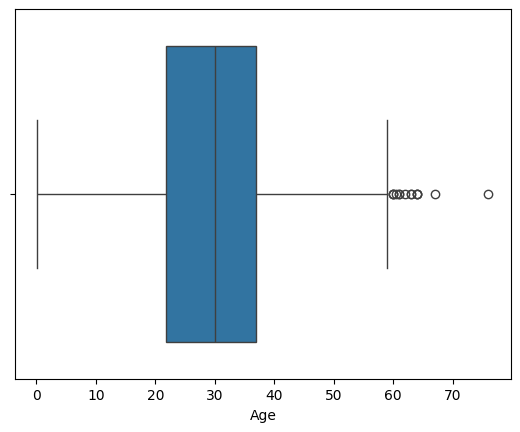

In [69]:
sns.boxplot(data=data_df, x='Age')

<Axes: xlabel='SibSp'>

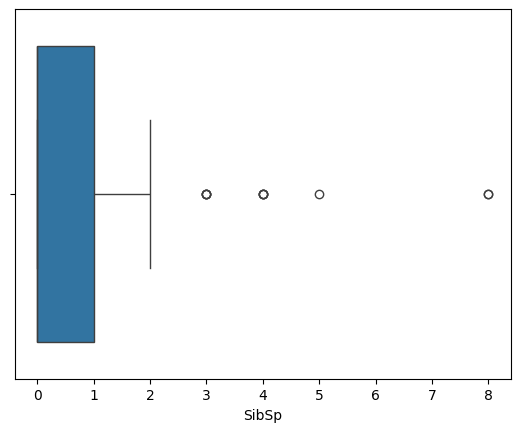

In [70]:
sns.boxplot(data=data_df, x='SibSp')


<Axes: xlabel='Parch'>

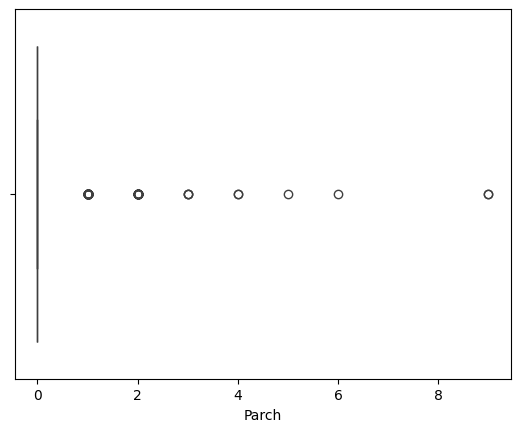

In [71]:
sns.boxplot(data=data_df, x='Parch')


<Axes: xlabel='Fare'>

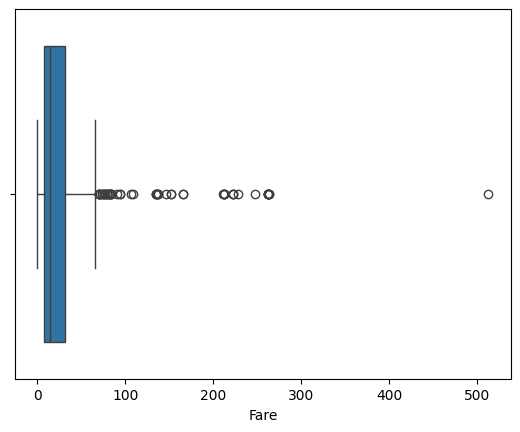

In [72]:
sns.boxplot(data=data_df, x='Fare')


In [ ]:
# age 이상치 조절
Q1 = np.percentile(data_df['Age'].dropna(),25)
Q3 = np.percentile(data_df['Age'].dropna(),75)
IQR = Q3 - Q1
Q1, Q3, IQR

bound_max = Q3 + 1.5*IQR
bound_min = Q1 - 1.5*IQR
bound_max, bound_min

# 방법 2: loc 사용
data_df.loc[data_df['Age'] > bound_max, 'Age'] = bound_max


<Axes: xlabel='Age'>

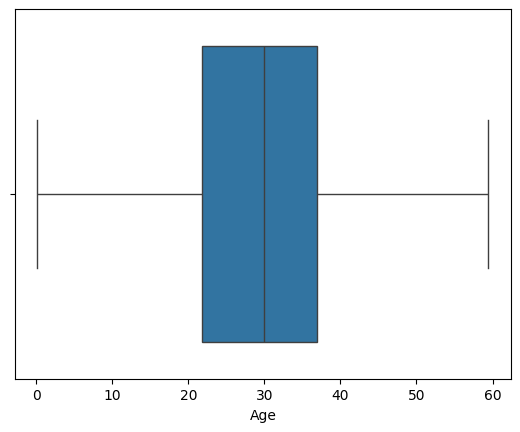

In [80]:
sns.boxplot(data=data_df, x='Age')


In [81]:
# fare 이상치 조절
Q1 = np.percentile(data_df['Fare'].dropna(),25)
Q3 = np.percentile(data_df['Fare'].dropna(),75)
IQR = Q3 - Q1
Q1, Q3, IQR

bound_max = Q3 + 1.5*IQR
bound_min = Q1 - 1.5*IQR
bound_max, bound_min

# 방법 2: loc 사용
data_df.loc[data_df['Fare'] > bound_max, 'Fare'] = bound_max

<Axes: xlabel='Fare'>

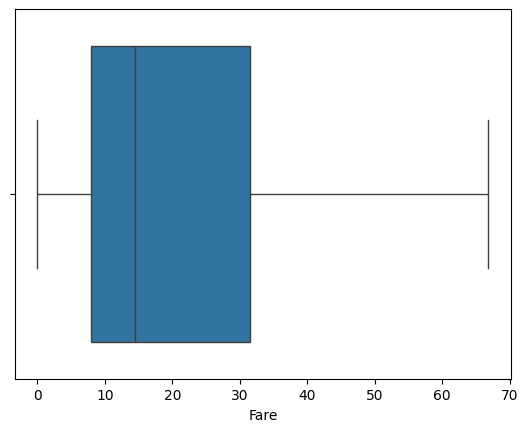

In [82]:
sns.boxplot(data=data_df, x='Fare')
